# Milestone 1

**Downloading Data:**

In [ ]:
!curl https://raw.githubusercontent.com/MadanKrishnan97/CMPT459CourseProjectSpring2021/main/dataset/location.csv --output ./location_data.csv
!curl https://raw.githubusercontent.com/MadanKrishnan97/CMPT459CourseProjectSpring2021/main/dataset/cases_train.csv --output ./cases_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  501k  100  501k    0     0  1097k      0 --:--:-- --:--:-- --:--:-- 1094k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43.2M  100 43.2M    0     0  11.3M      0  0:00:03  0:00:03 --:--:-- 11.3M


**Install Packages:**

In [ ]:
!pip install pandas
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import datetime
import seaborn as sns
from sklearn.impute import SimpleImputer

**1.1 Data Analysis:**

In [ ]:
cases_df = pd.read_csv('cases_data.csv')

NameError: ignored

In [ ]:
# display data type per attribute/column
cases_df.dtypes

age                    int64
sex                   object
province              object
country               object
latitude             float64
longitude            float64
date_confirmation     object
outcome               object
dtype: object

In [ ]:
# missing values for each attribute
cases_df.isnull().sum()

age                            0
sex                            0
province                       0
country                        0
latitude                       0
longitude                      0
date_confirmation              0
additional_information    344910
source                    128476
outcome                        0
dtype: int64

clean_sex_data() ...
status : success
impute_age_data() ...
status : success


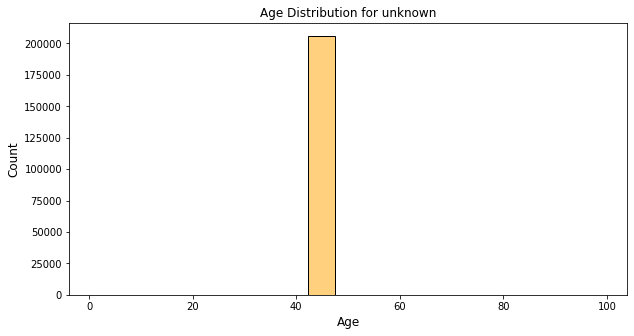

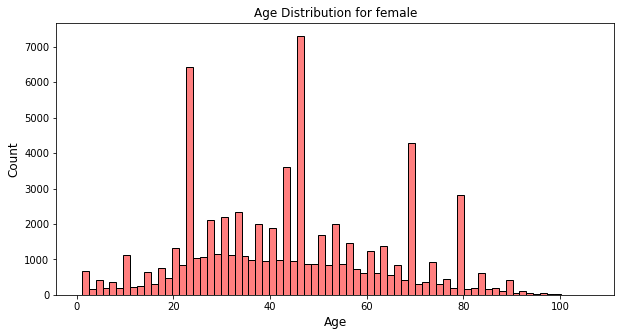

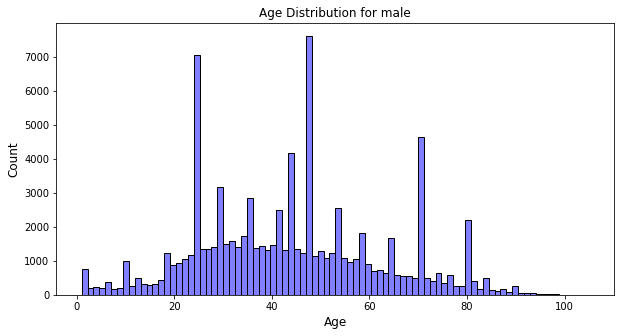

In [ ]:
# histogram plot to demonstrade age distribution for male and female:
def plot_age_and_sex():
    build_graph = False
    clean_sex_data()
    build_graph = impute_age_data(cases_df.age.tolist())

    if build_graph == True:
        color_idx = 0
        colors = ['orange', 'red', 'blue']
        for sex in cases_df['sex'].unique():
            plt.rcParams['figure.figsize'] = (10, 5)
            plt.title(f'Age Distribution for {sex}', size = 12)
            plt.xlabel('Age', size = 12)
            plt.ylabel('Count', size = 12)

            sns.histplot(cases_df['age'][cases_df['sex'] == sex],
                        color = colors[color_idx], 
                        label = 'Age', 
                        alpha=0.5,
                        linewidth=1)

            color_idx += 1
            plt.show()
    else:
        print("Message: No graph")

plot_age_and_sex()

clean_sex_data() ...
status : success


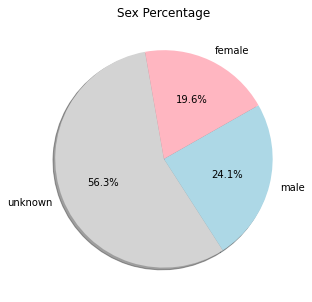

In [ ]:
# show the percentage of sexes in a pie chart
def plot_sex_graph():
    build_graph = False
    build_graph = clean_sex_data()

    if build_graph == True:
        counts = list(cases_df.sex.value_counts())
        labels = cases_df.sex.value_counts()
        labels = ['unknown', 'male', 'female']
        colors = ['lightgrey', 'lightblue', 'lightpink']
        plt.pie(counts, 
                labels=labels, 
                colors=colors, 
                autopct='%1.1f%%', 
                shadow=True, 
                startangle=100)
        
        plt.title('Sex Percentage', size = 12)
        plt.show()
    else:
        print("Message: No graph")
        
plot_sex_graph()

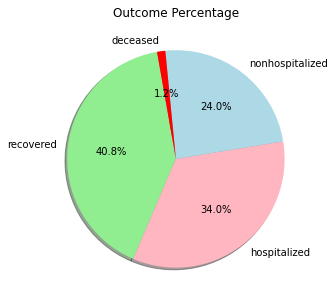

In [ ]:
# show the percentage of sexes in a pie chart
def def_plot_outcome():
    counts = list(cases_df.outcome.value_counts())
    labels = cases_df.outcome.value_counts()
    labels = cases_df.outcome.unique().tolist()
    colors = ['lightgreen', 'lightpink', 'lightblue', 'red']
    plt.pie(counts, 
            labels=labels, 
            colors=colors, 
            autopct='%1.1f%%', 
            shadow=True, 
            startangle=100)
    
    plt.title('Outcome Percentage', size = 12)
    plt.show()

def_plot_outcome()

1.2) Clean up and Imputation:

In [ ]:
# clean up age attribute
def clean_age_data(arr=cases_df.age.tolist()):
    for i in range(len(arr)):
        if arr[i] is np.nan:
            arr[i] = int(np.nan_to_num(arr[i]))
        if isinstance(arr[i], str):
            if '.' in arr[i]:               # str > float > int
                temp = int(round(float(arr[i])))
                arr[i] = temp if temp > 0 else -temp
            elif '-' in arr[i]:             # take avg of two numbers in string '15-34'
                split_arr = arr[i].split('-')
                t0 = split_arr[0]
                t1 = split_arr[1]
                avg = (round((int(t0) + int(t1)) / 2)) if len(t1) > 0 else int(t0)
                arr[i] = avg if avg > 0 else -avg
            elif '+' in arr[i]:             # convert strings with '+' to int
                split_arr = arr[i].split('+')
                num = int(split_arr[0])
                arr[i] = num if num > 0 else -num
            elif 'month' in arr[i]:         # convert months to years
                split_arr = arr[i].split(' ')
                arr[i] = round(int(split_arr[0]) / 12)
            else:                         # convert string int to actual int
                arr[i] = int(arr[i])
        elif isinstance(arr[i], float):   # round float values
                arr[i] = int(round(arr[i]))
        elif isinstance(arr[i], int):     # convert negative int to positive
            arr[i] = -arr[i] if arr[i] < 0 else arr[i]  

    # arr = np.array(cases_df.age).astype(np.float)
    return arr

# once done cleaning all values, replace all 0 value with mean value
def impute_age_data(arr):
    print("impute_age_data() ...")

    cases_df['age'] = clean_age_data(cases_df.age.tolist())
    
    val = 0
    if val in cases_df['age'].values.tolist():
        imputer = SimpleImputer(missing_values=val, strategy='mean')
        cases_df.age = imputer.fit_transform(cases_df['age'].values.reshape(-1,1))[:,0]
    else:
        print("Message: Impute already done")
        
    print("status : success")

    return True

# replace null entries by non-binary
def clean_sex_data():
    print("clean_sex_data() ...")
    cases_df['sex'] = cases_df['sex'].replace(np.nan, 'unknown', regex=True)
    print("status : success")

    return True

# clean null values for the attribute
def clean_date():
    print("clean_date() ...")

    arr = cases_df['date_confirmation'].tolist()
    for i, entry in enumerate(arr):
        if isinstance(entry, str) and '.' in entry:
            split_arr = entry.replace(" ","").split('-')
            entry = split_arr[0] if len(split_arr) == 1 else split_arr[1]
            d = datetime.datetime.strptime(entry, '%d.%m.%Y')
            arr[i] = d.strftime('%Y-%m-%d')

    cases_df['date_confirmation'] = arr

    # use the mean date to replace with nan
    mean = (np.array(cases_df['date_confirmation'].dropna(), dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]')).astype(str)

    cases_df['date_confirmation'] = cases_df['date_confirmation'].replace(np.nan, 
                                                              mean[0:10])
    
    print("status : success")

# handle null values for country and province attributes
def clean_cols(attributes=["country", "province"]):
    print("clean_cols() ...")

    for attribute in attributes: 
        if cases_df[attribute].isnull().sum() > 0:
            cases_df[attribute] = cases_df[attribute].replace(np.nan, 'none')

    # handle null values for lattitude and longitude attributes
    cases_df.dropna(subset=['latitude'], inplace=True)
    cases_df.dropna(subset=['longitude'], inplace=True)

    print("status : success")

# drop unused columns
def remove_unused_cols(df):
    print("remove_unused_cols() ...")
        
    if 'source' in df.columns:
        df = df.drop('source', axis = 1)
    if 'additional_information' in df.columns:
        df = df.drop('additional_information', axis = 1)
    else:
        print("Message: columns do not exist!")
    print("status : success")

    return df


cases_df = remove_unused_cols(cases_df)
clean_date()
clean_cols()

remove_unused_cols() ...
status : success
clean_date() ...
status : success
clean_cols() ...
status : success


In [ ]:
def handle_skewed_data(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    print(df['Income'].quantile(0.10))
    print(df['Income'].quantile(0.90))
    df["Income"] = np.where(df["Income"] <2960.0, 2960.0,df['Income'])
    df["Income"] = np.where(df["Income"] >12681.0, 12681.0,df['Income'])
    print(df['Income'].skew())
    index = df[(df['Age'] >= 100)|(df['Age'] <= 18)].index
    df.drop(index, inplace=True)
    df['Age'].describe()
    df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(df_out.shape)
    df["Log_Loanamt"] = df["Loan_amount"].map(lambda i: np.log(i) if i > 0 else 0) 
    print(df['Loan_amount'].skew())
    print(df['Log_Loanamt'].skew())
    print(df['Loan_amount'].quantile(0.50)) 
    print(df['Loan_amount'].quantile(0.95)) 
    df['Loan_amount'] = np.where(df['Loan_amount'] > 325, 140, df['Loan_amount'])
    df.describe()

In [ ]:
# total = len(cases_df.index)

In [ ]:
# display all the unique values for each attribute
for attribute in cases_df.columns:
  pprint(f"==================== Attribute: {attribute} ==================== ")
  pprint(cases_df[attribute].unique())
  print()

**1.1 Data Analysis (Visualizations)**

Operations on Location data:

In [ ]:
location_df = pd.read_csv('location_data.csv')

In [ ]:
location_df.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.93911,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.15330,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.03390,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.50630,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.20270,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265


In [ ]:
location_df['Last_Update'] = pd.to_datetime(location_df['Last_Update'])

In [ ]:
# missing values in each column for location dataset
print(location_df.isnull().sum())

Province_State         168
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incidence_Rate          80
Case-Fatality_Ratio     48
dtype: int64


**Load Data from Google Drive and Wite back to Google Drive:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = "CMPT459" # The name of the directory you saved your data in
BASE_URL = f'./drive/My Drive/{data_dir}'

In [ ]:
location_data_filename = 'location_transformed.csv' # your processed filename
location_data_path = f'{BASE_URL}/{location_data_filename}'
cases_trained_filename = 'cases_train_processed.csv' # your processed filename
cases_trained_data_path = f'{BASE_URL}/{cases_trained_filename}'

In [ ]:
cases_trained_data = pd.read_csv(cases_trained_data_path)

FileNotFoundError: ignored

In [ ]:
cases_trained_data.head(5)

NameError: ignored

In [ ]:
location_data = pd.read_csv(location_data_path)

FileNotFoundError: ignored

In [ ]:
location_data.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.93911,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.15330,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.03390,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.50630,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.20270,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265


In [ ]:
location_data.to_csv(f'{BASE_URL}/some_file.csv')

FileNotFoundError: ignored

# Milestone 2